<a href="https://colab.research.google.com/github/cyber-prags/ML-and-BioOptimization/blob/main/N_arm_bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-arm bandit problem

-- _Pragyan Jyoti Dutta, Patalo Selobakin, Victor Gonzalez Alvarez, Daniela Dzah_

### Importing the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting a seed for reproducibility at a later time
np.random.seed(0)

### Setting the initial parameters

In [2]:
# Parameters
n_arms_options = [5, 10, 20] #Setting the number of arms as a list to iterate over later on
n_plays = 2000 #n_plays represents the total number of plays to be implemented
epsilon_values= [0.01, 0.05, 0.1, 0.2, 0.5, 0.9, 1]  # We use a trail and error method to find the optimal epsilon for our problem.

In the above **epsilon_values** sets the epsilon values; each determining the probability of choosing exploration over exploitation. Values close to _1_ being more inclined towards more exploration while values close to _0_ being close to preferring more exploitation over exploration.

### Greedy Epsilon Function

In [4]:
# Function to run the bandit algorithm
def run_epsilon_greedy_bandit(n_arms, epsilon):
    """
    Simulates an ε-greedy strategy on a n-armed bandit problem.

    This function runs a simulation of the n-armed bandit problem using an ε-greedy strategy,
    where ε controls the trade-off between exploration and exploitation. At each step, the
    algorithm either explores by selecting a random arm with probability ε or exploits by
    choosing the arm with the highest estimated reward with probability 1 - ε. The function
    updates the estimated rewards (Q-values) based on the observed rewards and tracks the
    total reward, the number of times each arm is selected, and the proportion of times the
    optimal arm is chosen.

    Parameters:
    - n_arms (int): The number of arms in the bandit problem.
    - epsilon (float): The probability of selecting an exploration over exploitation action.

    Returns:
    - q_values (ndarray): An array containing the final estimated values (Q-values) of each arm.
    - total_reward (float): The total accumulated reward over all plays.
    - rewards (list): A list of boolean values indicating whether a reward was received (True) or not (False) at each play.
    - optimal_action_count (list): A list of boolean values indicating whether the optimal arm was chosen (True) or not (False) at each play.
    - average_rewards (ndarray): An array containing the average rewards computed at each play.
    - optimal_action_percentages (ndarray): An array containing the percentage of times the optimal arm was selected, computed at each play.

    The function generates random reward probabilities for each arm at the start, simulates the
    selection of arms based on the ε-greedy strategy, and updates the estimated values (Q-values)
    of each arm based on the rewards observed. It calculates and returns the total reward,
    the sequence of rewards, the estimated values of each arm, and the proportion of optimal actions over the simulation.
    """
    # reward_probabilities variable below generates random reward probabilities for each arm
    reward_probabilities = np.random.rand(n_arms)

    #Initialize arrays to store the estimated values (q_values), the number of times each arm is selected (n_selected), and other metrics like total reward and the history of rewards
    q_values = np.zeros(n_arms)  # Estimated values of each arm
    n_selected = np.zeros(n_arms)  # Number of times each arm was selected
    total_reward = 0
    rewards = []
    optimal_action_count = []

    # Let us run the bandit algorithm
    for play in range(n_plays):
        # Exploration vs exploitation
        if np.random.rand() < epsilon:
            # Explore: select a random arm
            chosen_arm = np.random.choice(n_arms)
        else:
            # Exploit: select the arm with the highest estimated value
            chosen_arm = np.argmax(q_values)

        # Simulate pulling the arm
        reward = np.random.rand() < reward_probabilities[chosen_arm]
        rewards.append(reward)
        total_reward += reward
        n_selected[chosen_arm] += 1

        # Update the estimated value (Q-value) for the chosen arm
        q_values[chosen_arm] += (reward - q_values[chosen_arm]) / n_selected[chosen_arm]

        # Check if the optimal arm is chosen
        optimal_arm = np.argmax(reward_probabilities)
        is_optimal = chosen_arm == optimal_arm
        optimal_action_count.append(is_optimal)

    # Calculate average reward and optimal action percentage
    average_rewards = np.cumsum(rewards) / np.arange(1, n_plays + 1)
    optimal_action_percentages = np.cumsum(optimal_action_count) / np.arange(1, n_plays + 1) * 100

    return q_values, total_reward, rewards, optimal_action_count, average_rewards, optimal_action_percentages



Results for n_arms=5 with best epsilon=0.05:
Q-values for the arms: [0.37468354 0.00793651 0.51558753 0.42857143 0.45128205]
Total reward: 722
Percentage of optimal action: 20.849999999999998
Rewards: [True, False, True, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, True, False, True, False, False, True, True, True, False, True, True, False, True, True, False, False, False, False, False, True, False, False, True, False, False, True, False, False, False, True, False, False, False, True, False, True, False, True, False, True, False, False, True, False, True, True, False, True, True, False, True, False, False, False, True, False, False, False, False, False, True, False, True, True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, True, False, False, False, False, True, True, False, False, True, True, True, True, False, False, True, False, True, False, Fal

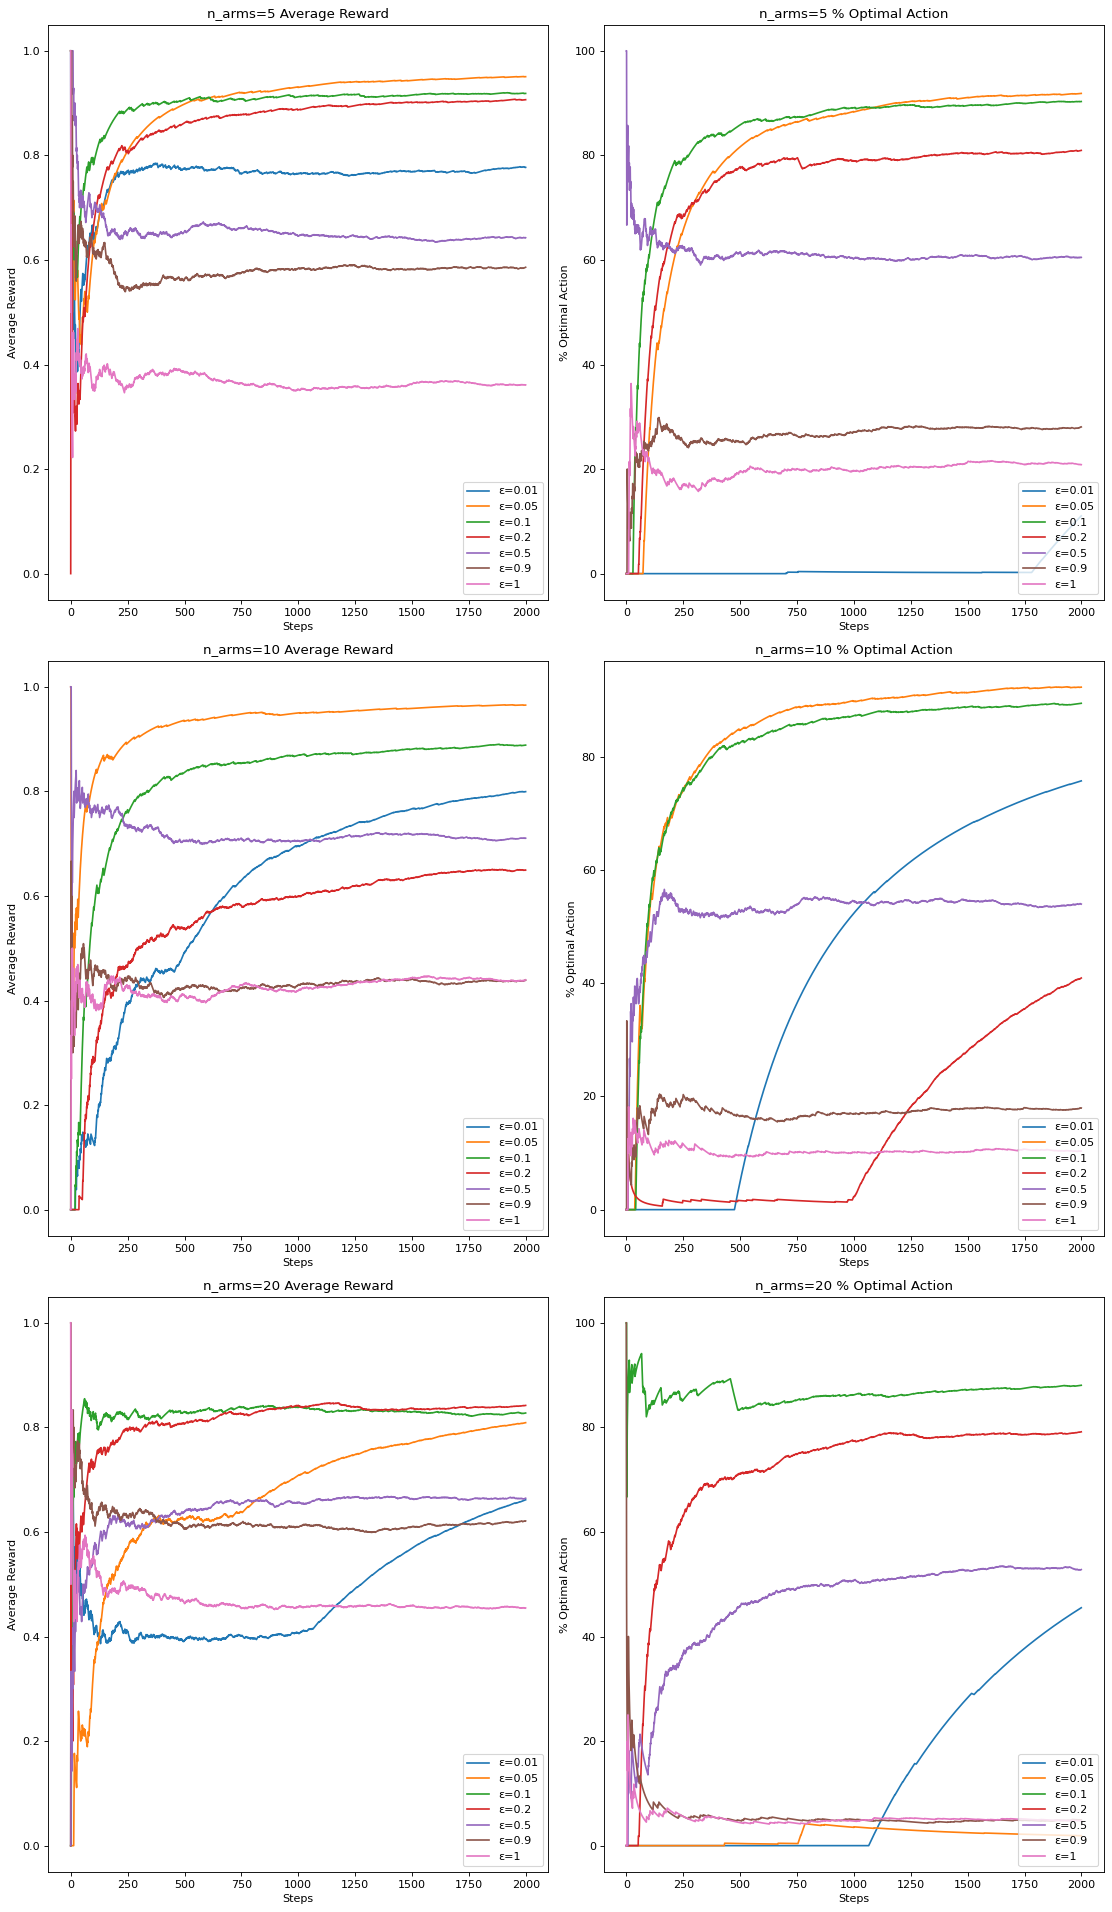

In [8]:
# Initialize separate plots for average reward and % optimal action
fig, axes = plt.subplots(len(n_arms_options), 2, figsize=(14, 8 * len(n_arms_options)), dpi=80, squeeze=False)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Loop over different values of n_arms
for i, n_arms in enumerate(n_arms_options):
    best_epsilon = None
    best_average_reward = 0

    # Run the bandit for different epsilon values
    for epsilon in epsilon_values:
        q_values, total_reward, rewards, optimal_action_count, average_rewards, optimal_action_percentages = run_epsilon_greedy_bandit(n_arms, epsilon)

        # Update the best_epsilon if the current one is better
        if average_rewards[-1] > best_average_reward:
            best_average_reward = average_rewards[-1]
            best_epsilon = epsilon

        # Plotting
        axes[i, 0].plot(average_rewards, label=f'ε={epsilon}')
        axes[i, 1].plot(optimal_action_percentages, label=f'ε={epsilon}')

    # Printing the results for the best epsilon
    print(f"Results for n_arms={n_arms} with best epsilon={best_epsilon}:")
    print("Q-values for the arms:", q_values)
    print("Total reward:", total_reward)
    print("Percentage of optimal action:", np.mean(optimal_action_count) * 100)
    print("Rewards:", rewards)
    print("\n")

    # Set labels and titles
    axes[i, 0].set_title(f'n_arms={n_arms} Average Reward')
    axes[i, 0].set_xlabel('Steps')
    axes[i, 0].set_ylabel('Average Reward')
    axes[i, 0].legend()

    axes[i, 1].set_title(f'n_arms={n_arms} % Optimal Action')
    axes[i, 1].set_xlabel('Steps')
    axes[i, 1].set_ylabel('% Optimal Action')
    axes[i, 1].legend(loc='lower right')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Conclusion:

- From the above plots and results we see that:
  - for **n_arms=5**, optimal value of _epsilon=0.05_ with a total reward of _569_ which accounts for **20.35%** of optimal action.

  - for **n_arms=10**, optimal value of _epsilon=0.05_ with a total reward of _1179_ which accounts for **10.10%** of optimal action.

  - for **n_arms=20**, optimal value of _epsilon=0.1_ with a total reward of _905_ which accounts for **4.65%** of optimal action.


- Therefore the optimal reward is gained by choosing n_arms=10 and epsilon=0.05.